# Pycaret Implementation
Following this tutorial: https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb

In [37]:
import pandas as pd
import pyforest
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pycaret
pycaret.__version__

'3.2.0'

In [39]:
# TODO: look into columns. drop some, bucket some, etc. 

#read in data 
train = pd.read_csv('training.csv')

#figure out which columns are categorical 
cat_cols = train.select_dtypes(include=['object']).columns.tolist()

#1 hot encode the categorical data 
train = pd.get_dummies(train, columns=cat_cols)
train.columns

Index(['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population',
       'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s',
       ...
       'Region_West', 'Division_East North Central',
       'Division_East South Central', 'Division_Middle Atlantic',
       'Division_Mountain', 'Division_New England', 'Division_Pacific',
       'Division_South Atlantic', 'Division_West North Central',
       'Division_West South Central'],
      dtype='object', length=290)

In [59]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [61]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [63]:

# init setup on exp
exp.setup(train, target = 'DiagPeriodL90D', session_id = 123)

,Description,Value
0,Session id,123
1,Target,DiagPeriodL90D
2,Target type,Regression
3,Original data shape,"(12906, 290)"
4,Transformed data shape,"(12906, 290)"
5,Transformed train set shape,"(9034, 290)"
6,Transformed test set shape,"(3872, 290)"
7,Numeric features,289
8,Rows with missing values,69.5%
9,Preprocess,True


In [64]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.3052,0.1488,0.3856,0.3625,0.2699,0.2423,1.7610
br,Bayesian Ridge,0.2996,0.1492,0.3861,0.3610,0.2697,0.2378,0.1060
ridge,Ridge Regression,0.2950,0.1498,0.3869,0.3584,0.2697,0.2337,0.0430
lr,Linear Regression,0.2946,0.1501,0.3872,0.3573,0.2699,0.2332,0.3550
lightgbm,Light Gradient Boosting Machine,0.2993,0.1548,0.3933,0.3369,0.2733,0.2386,0.4250
omp,Orthogonal Matching Pursuit,0.3145,0.1579,0.3972,0.3239,0.2777,0.2503,0.0490
rf,Random Forest Regressor,0.3009,0.1632,0.4039,0.3009,0.2797,0.2437,7.0800
ada,AdaBoost Regressor,0.3685,0.1677,0.4094,0.2819,0.2791,0.3483,0.3590
et,Extra Trees Regressor,0.2957,0.1722,0.4149,0.2624,0.2862,0.2394,3.8080
lasso,Lasso Regression,0.4662,0.2334,0.4831,0.0007,0.3389,0.3713,0.1500


In [65]:
# compare models using OOP
# exp.compare_models()

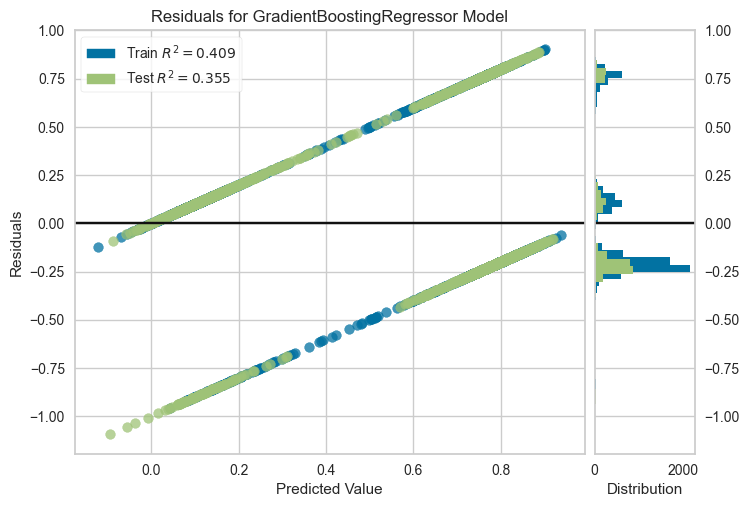

In [66]:
# plot residuals
plot_model(best, plot = 'residuals')

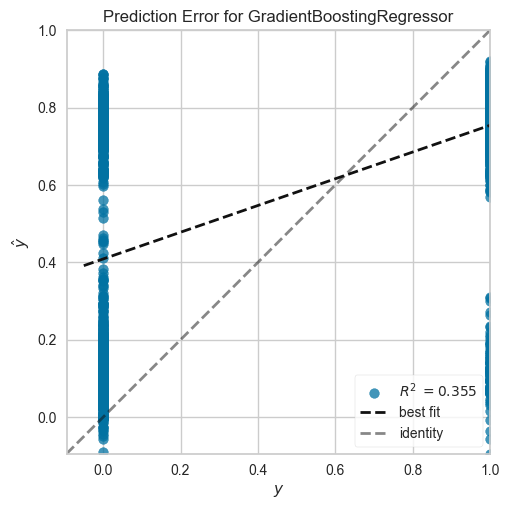

In [67]:
# plot error
plot_model(best, plot = 'error')

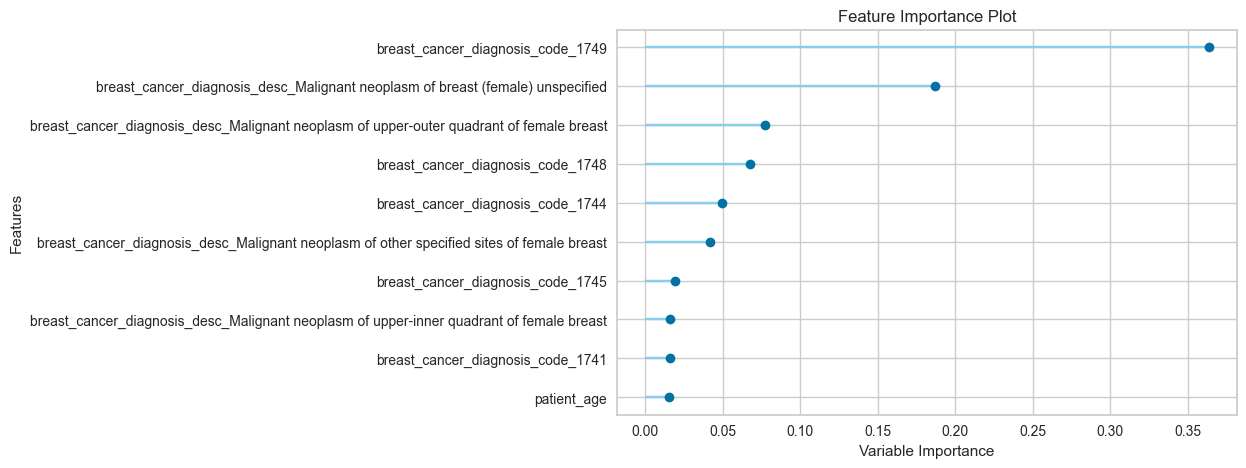

In [68]:

# plot feature importance
plot_model(best, plot = 'feature')

In [69]:
# check docstring to see available plots 
# help(plot_model)

In [70]:
# test it! 
test = pd.read_csv('test.csv')

#figure out which columns are categorical 
cat_cols = test.select_dtypes(include=['object']).columns.tolist()

#1 hot encode the categorical data 
test = pd.get_dummies(test, columns=cat_cols)

#add missing columns with 0 values 
missing_cols = ['patient_state_CT', 'patient_state_NH', 'patient_state_PR', 'patient_state_RI', 'breast_cancer_diagnosis_code_1759', 'breast_cancer_diagnosis_code_C50', 'breast_cancer_diagnosis_code_C5001', 'breast_cancer_diagnosis_code_C50021', 'breast_cancer_diagnosis_code_C5011', 'breast_cancer_diagnosis_code_C5051', 'breast_cancer_diagnosis_desc_Malignant neoplasm of breast', 'breast_cancer_diagnosis_desc_Malignant neoplasm of central portion of breast, female', 'breast_cancer_diagnosis_desc_Malignant neoplasm of lower-outer quadrant of breast, female', 'breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, female', 'breast_cancer_diagnosis_desc_Malignant neoplasm of nipple and areola, right male breast', 'breast_cancer_diagnosis_desc_Malignant neoplasm of other and unspecified sites of male breast', 'metastatic_cancer_diagnosis_code_C7830', 'metastatic_cancer_diagnosis_code_C784', 'metastatic_cancer_diagnosis_code_C7901', 'metastatic_cancer_diagnosis_code_C7910', 'metastatic_cancer_diagnosis_code_C7911', 'metastatic_cancer_diagnosis_code_C7919', 'metastatic_cancer_diagnosis_code_C7962']
for col in missing_cols:
    test[col] = 0

In [71]:
# predict model on new_data
predictions = predict_model(best, data = test)
predictions.head()

results = predictions[['patient_id', 'prediction_label']]
results.to_csv("results.csv", index=False)

# Data Setup for non-pycaret method below

In [ ]:
#split up target and characteristics
X = train.drop(columns=["DiagPeriodL90D"], axis=1)
y = train.DiagPeriodL90D

In [ ]:
#split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#run data on multiple models
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models